## Entropy

In [66]:
import numpy as np
from scipy.stats import entropy

base = 2  # work in units of bits
pk = np.array([1/2, 1/2])  # fair coin
H = entropy(pk, base=base)
H

1.0

In [67]:
pk = np.array([1, 0])    # unfair coin
H = entropy(pk, base=base)
H

0.0

## Kullback-Leibler divergence

In [68]:
from scipy.special import kl_div

mu1, sigma1 = 10, 1
s1 = np.random.normal(mu1, sigma1, 1000)

for delta in [0.001, 0.1, 1, 10]:
    s2 = s1 + delta
    value = np.sum(kl_div(s1, s2))
    print(f"delta: {delta:.4f}, kl div: {value:.4f}")

delta: 0.0010, kl div: 0.0001
delta: 0.1000, kl div: 0.4994
delta: 1.0000, kl div: 47.1117
delta: 10.0000, kl div: 3072.1498


# Exploratory data analysis

In [69]:
import numpy as np
import pandas as pd


pd.options.display.max_rows = 1000


train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

train.shape, test.shape

((20483, 61), (9988, 59))

In [70]:
# show datatypes and count of non-null values for all columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20483 entries, 0 to 20482
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   max_floor                              10911 non-null  float64
 1   state                                  8469 non-null   float64
 2   marital_status                         20483 non-null  object 
 3   big_market_raion                       20483 non-null  object 
 4   total_revolving_bal                    20483 non-null  int64  
 5   market_count_1500                      20483 non-null  int64  
 6   leisure_count_3000                     20483 non-null  int64  
 7   total_ct_chng_q4_q1                    20483 non-null  float64
 8   water_1line                            20483 non-null  object 
 9   railroad_station_walk_km               20473 non-null  float64
 10  culture_objects_top_25                 20483 non-null  object 
 11  co

In [71]:
result = (
    train
    .isnull().sum()                   # count of non-null values
    .sort_values(ascending=False)     # sort values using descending order
)

result[result > 0]

state                          12014
build_year                     11582
num_room                        9572
max_floor                       9572
cafe_sum_1000_min_price_avg     4596
life_sq                         4193
build_count_mix                 3063
build_count_wood                3063
cafe_sum_1500_min_price_avg     2998
total_trans_amt                 2403
0_17_all                        2403
floor                            167
metro_km_walk                     10
railroad_station_walk_km          10
dtype: int64

In [72]:
train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
max_floor,10911.0,12.55,6.55,0.00,9.00,12.00,17.00,48.00
state,8469.0,2.19,0.89,1.00,2.00,2.00,3.00,33.00
total_revolving_bal,20483.0,1137.91,784.99,0.00,577.00,1195.00,1742.00,2517.00
market_count_1500,20483.0,0.78,1.14,0.00,0.00,0.00,1.00,7.00
leisure_count_3000,20483.0,3.59,12.34,0.00,0.00,0.00,2.00,85.00
total_ct_chng_q4_q1,20483.0,0.66,0.17,0.00,0.57,0.68,0.77,2.53
railroad_station_walk_km,20473.0,4.31,3.76,0.03,1.92,3.21,5.17,24.65
contacts_count_12_mon,20483.0,2.28,0.54,0.00,2.00,2.00,3.00,6.00
0_17_all,18080.0,12724.00,9286.40,411.00,3831.00,12508.00,17354.00,45170.00
trc_count_2000,20483.0,5.92,6.15,0.00,1.00,5.00,9.00,37.00


In [73]:
train.sample(5).T

,15166,4556,4653,4395,15569
max_floor,9.0,NaN,NaN,NaN,9.0
state,3.0,NaN,NaN,NaN,2.0
marital_status,Single,Single,Married,Married,Single
big_market_raion,no,no,no,no,no
total_revolving_bal,0,1784,2146,52,21
market_count_1500,1,0,4,0,2
leisure_count_3000,0,0,4,0,1
total_ct_chng_q4_q1,0.545,0.634,1.065,0.639,0.748
water_1line,no,no,no,no,no
railroad_station_walk_km,2.185828,3.879279,2.827441,7.713678,2.705634


In [74]:
corr = train.corr(numeric_only=True)

In [75]:
corr.head().T.head().round(2)

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000
max_floor,1.00,-0.04,-0.02,-0.08,-0.03
state,-0.04,1.00,-0.00,0.12,-0.05
total_revolving_bal,-0.02,-0.00,1.00,0.02,0.01
market_count_1500,-0.08,0.12,0.02,1.00,0.18
leisure_count_3000,-0.03,-0.05,0.01,0.18,1.00


In [76]:
corr['__churn'].abs().sort_values(ascending=False).head(10)

__churn                     1.000000
contacts_count_12_mon       0.555666
total_ct_chng_q4_q1         0.424119
months_inactive_12_mon      0.325025
total_trans_ct              0.322356
total_relationship_count    0.259767
total_amt_chng_q4_q1        0.243586
total_revolving_bal         0.209078
total_trans_amt             0.192359
avg_utilization_ratio       0.164768
Name: __churn, dtype: float64

In [77]:
corr['__price_doc'].abs().sort_values(ascending=False).head(10)

__price_doc                   1.000000
num_room                      0.458204
full_sq                       0.290589
sport_count_2000              0.278837
office_sqm_5000               0.242210
detention_facility_km         0.208426
trc_count_2000                0.193177
leisure_count_5000            0.183895
metro_km_walk                 0.171779
cafe_count_1000_price_1000    0.157386
Name: __price_doc, dtype: float64

# EDA with ydata-profiling

`pip install ydata-profiling`

In [66]:
pip install ydata-profiling

In [78]:
import pandas as pd
from ydata_profiling import ProfileReport

profile_train = ProfileReport(train, explorative=True)
profile_train.to_file("../data/processed/eda-train.html")

profile_test = ProfileReport(test, explorative=True)
profile_test.to_file("../data/processed/eda-test.html")

C:\Users\ViztaEdu\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ViztaEdu\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data transformation

In [68]:
pip install category_encoders

In [79]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders


def plot_before_after(dataset, before, after):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax = ax.ravel()

    if dataset[before].dtype == np.object_:
        dataset[before].hist(ax=ax[0])
    else:
        dataset[[before]].hist(bins=50, ax=ax[0])
        
    dataset[[after]].hist(bins=50, ax=ax[1])


## Robust Scaler

In [80]:
from sklearn.preprocessing import RobustScaler
     
transformer = RobustScaler(unit_variance=False)
transformer.fit(train[['metro_km_walk']])

train['f__metro_km_walk'] = transformer.transform(train[['metro_km_walk']])
test['f__metro_km_walk'] = transformer.transform(test[['metro_km_walk']])

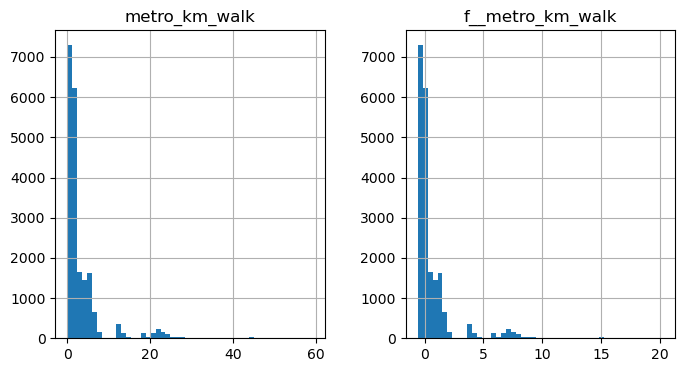

In [81]:
plot_before_after(train, 'metro_km_walk', 'f__metro_km_walk')

## Log transform

In [82]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer


tr_log = FunctionTransformer(func=np.log1p)
tr_log.fit(train['credit_limit'])

train['f__credit_limit'] = tr_log.transform(train['credit_limit']).values
test['f__credit_limit'] = tr_log.transform(test['credit_limit']).values

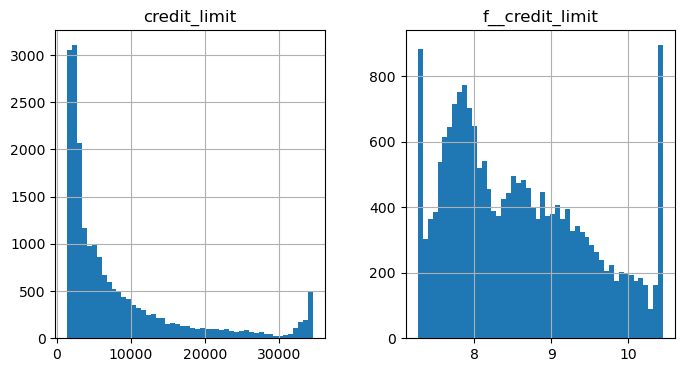

In [83]:
plot_before_after(train, 'credit_limit', 'f__credit_limit')

## SimpleImputer

In [84]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(train[['state']])

train['f__state'] = imp_mean.transform(train[['state']])
test['f__state'] = imp_mean.transform(test[['state']])

In [85]:
(
    train[['f__state', 'state']]
    .isnull()
    .sum()
)

f__state        0
state       12014
dtype: int64

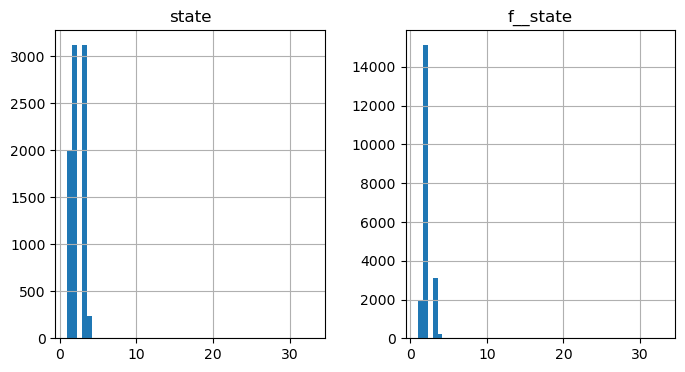

In [86]:
plot_before_after(train, 'state', 'f__state')

## Custom Function

In [87]:
import numpy as np

from sklearn.preprocessing import FunctionTransformer


def max_value_func(x, border_quantile=0.05):
    x_dropna = x.dropna()
    high_quantile = np.quantile(x_dropna, 1 - border_quantile)
    low_quantile = np.quantile(x_dropna, border_quantile)
    median = np.median(x_dropna)
    
    _x = x.fillna(median)
    _x = np.minimum(_x, high_quantile)
    return np.maximum(_x, low_quantile)


tr_max_value = FunctionTransformer(func=max_value_func)
train['f__build_year'] = tr_max_value.fit_transform(train[['build_year']])
test['f__build_year'] = tr_max_value.transform(test[['build_year']])

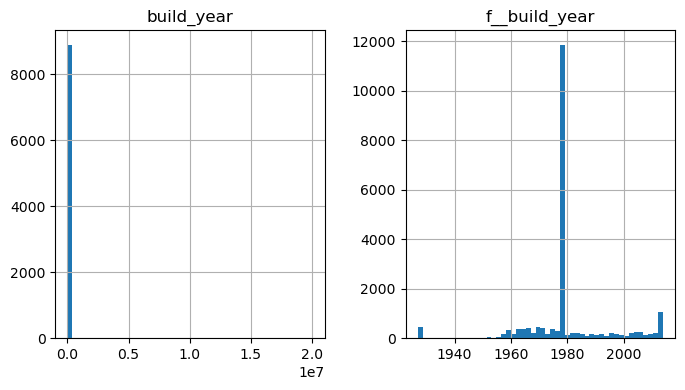

In [88]:
plot_before_after(train, 'build_year', 'f__build_year')

## Z-score

In [89]:
from sklearn.preprocessing import StandardScaler

tr_sc = StandardScaler()
tr_sc.fit(train[['f__credit_limit']])

train['f_1_credit_limit'] = tr_sc.transform(train[['f__credit_limit']])
test['f_1_credit_limit'] = tr_sc.transform(test[['f__credit_limit']])

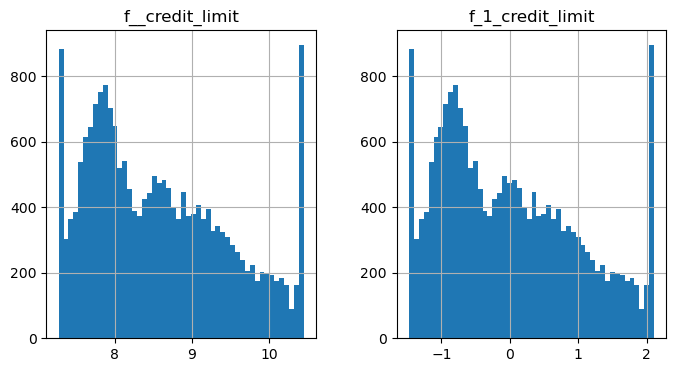

In [90]:
plot_before_after(train, 'f__credit_limit', 'f_1_credit_limit')

## TargetEncoder

In [91]:
import pandas as pd

num_quantiles = 10
_, bins = pd.qcut(train['mkad_km'],
                  q=num_quantiles,
                  retbins=True
)
bins

array([1.36261820e-02, 1.31010273e+00, 2.28813119e+00, 3.11730000e+00,
       3.98242849e+00, 5.38602453e+00, 6.01556837e+00, 7.38656007e+00,
       8.88987958e+00, 1.17512766e+01, 5.32778325e+01])

In [92]:
train['f_1_mkad_km'] = pd.cut(train['mkad_km'], bins=bins).astype(str)
test['f_1_mkad_km'] = pd.cut(test['mkad_km'], bins=bins).astype(str)

In [93]:
train[['mkad_km', 'f_1_mkad_km']].sample(5)

,mkad_km,f_1_mkad_km
4785,7.371716,"(6.016, 7.387]"
14324,12.291694,"(11.751, 53.278]"
10602,5.946908,"(5.386, 6.016]"
18799,4.528347,"(3.982, 5.386]"
10668,7.496034,"(7.387, 8.89]"


In [94]:
from category_encoders import TargetEncoder

enc = TargetEncoder()
enc.fit(train['f_1_mkad_km'], train['__price_doc'])

train['f__mkad_km_encode'] = enc.transform(train['f_1_mkad_km'])
test['f__mkad_km_encode'] = enc.transform(test['f_1_mkad_km'])

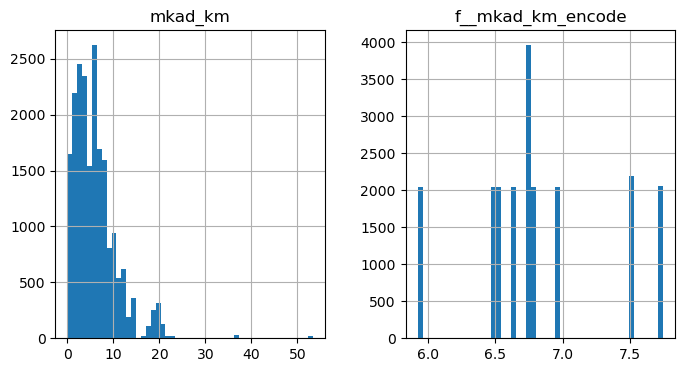

In [95]:
plot_before_after(train, 'mkad_km', 'f__mkad_km_encode')

## Quantile transformation

In [96]:
from sklearn.preprocessing import QuantileTransformer

quntile = QuantileTransformer(output_distribution='normal')
quntile.fit(train[['mkad_km']])

train['f_2_mkad_km'] = quntile.transform(train[['mkad_km']])
test['f_2_mkad_km'] = quntile.transform(test[['mkad_km']])

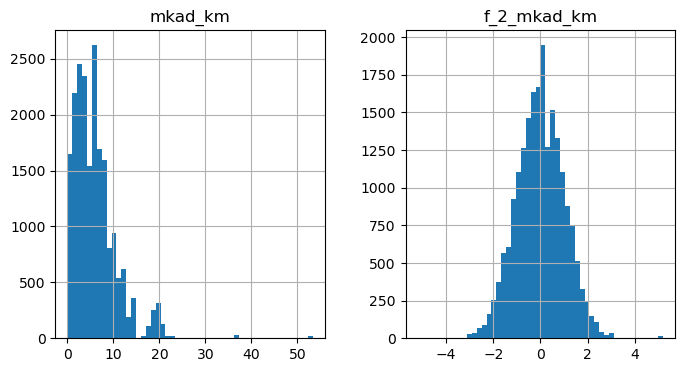

In [37]:
plot_before_after(train, 'mkad_km', 'f_2_mkad_km')

## OneHotEncoder

In [97]:
from sklearn.preprocessing import OneHotEncoder


onehot = OneHotEncoder(sparse_output=False)
onehot.fit(train[['income_category']])

values_train = onehot.transform(train[['income_category']])
values_test = onehot.transform(test[['income_category']])

list_names = []
for i, cat in enumerate(onehot.categories_[0]):
    name = f'f__income_category_{cat}'
    list_names.append(name)
    train[name] = values_train[:, i]
    test[name] = values_test[:, i]

In [98]:
onehot.categories_[0]

array(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'], dtype=object)

In [99]:
list_names

['f__income_category_$120K +',
 'f__income_category_$40K - $60K',
 'f__income_category_$60K - $80K',
 'f__income_category_$80K - $120K',
 'f__income_category_Less than $40K',
 'f__income_category_Unknown']

In [100]:
train[['income_category'] + list_names].head()

,income_category,f__income_category_$120K +,f__income_category_$40K - $60K,f__income_category_$60K - $80K,f__income_category_$80K - $120K,f__income_category_Less than $40K,f__income_category_Unknown
0,Less than $40K,0.0,0.0,0.0,0.0,1.0,0.0
1,$40K - $60K,0.0,1.0,0.0,0.0,0.0,0.0
2,$40K - $60K,0.0,1.0,0.0,0.0,0.0,0.0
3,$60K - $80K,0.0,0.0,1.0,0.0,0.0,0.0
4,Less than $40K,0.0,0.0,0.0,0.0,1.0,0.0


## Weight of Evidence

In [101]:
from category_encoders.woe import WOEEncoder


woe = WOEEncoder(cols=['income_category'])
woe.fit(train[['income_category']], train[['__churn']])

train['f__income_category_target_churn'] = woe.transform(train['income_category']).values
test['f__income_category_target_churn'] = woe.transform(test['income_category']).values

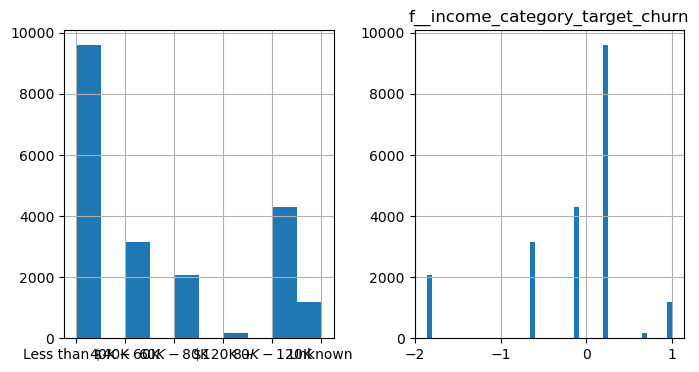

In [102]:
plot_before_after(train, 'income_category', 'f__income_category_target_churn')

# Save preprocessing datasets

In [103]:
train.to_csv('../data/processed/train.csv', index=False)
test.to_csv('../data/processed/test.csv', index=False)

In [104]:
train.shape, test.shape

((20483, 76), (9988, 74))

In [105]:
new_columns = train.columns[train.columns.str.startswith('f__')]
print(len(new_columns))
print(new_columns)

12
Index(['f__metro_km_walk', 'f__credit_limit', 'f__state', 'f__build_year',
       'f__mkad_km_encode', 'f__income_category_$120K +',
       'f__income_category_$40K - $60K', 'f__income_category_$60K - $80K',
       'f__income_category_$80K - $120K', 'f__income_category_Less than $40K',
       'f__income_category_Unknown', 'f__income_category_target_churn'],
      dtype='object')


# New code for Hypothesis 1
## Handling Missing Values

In [106]:
# 1. Handling Missing Values
# Check for missing values in the entire dataset

missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()

print("Missing values in train before:", missing_values_train)
print("Missing values in test before :", missing_values_test)

Missing values in train before: max_floor                                 9572
state                                    12014
marital_status                               0
big_market_raion                             0
total_revolving_bal                          0
market_count_1500                            0
leisure_count_3000                           0
total_ct_chng_q4_q1                          0
water_1line                                  0
railroad_station_walk_km                    10
culture_objects_top_25                       0
contacts_count_12_mon                        0
0_17_all                                  2403
trc_count_2000                               0
product_type                                 0
build_count_wood                          3063
credit_limit                                 0
total_trans_ct                               0
leisure_count_5000                           0
life_sq                                   4193
cafe_count_1000_price_1000  

In [107]:
from sklearn.impute import SimpleImputer

# Select numeric columns for imputation
numeric_columns_train = train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_test = test.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values in numeric columns with mean
imputer = SimpleImputer(strategy='mean')
train[numeric_columns_train] = imputer.fit_transform(train[numeric_columns_train])

# Ensure test set columns match the train set columns for imputation
missing_columns_test = set(numeric_columns_train) - set(numeric_columns_test)
for column in missing_columns_test:
    test[column] = 0  # Set missing columns to a default value

# Apply imputation to the test set
test[numeric_columns_train] = imputer.transform(test[numeric_columns_train])

# Check for missing values after imputation
missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()

print("Missing values in train after imputation:")
print(missing_values_train)
print("Missing values in test after imputation:")
print(missing_values_test)

Missing values in train after imputation:
max_floor                                0
state                                    0
marital_status                           0
big_market_raion                         0
total_revolving_bal                      0
market_count_1500                        0
leisure_count_3000                       0
total_ct_chng_q4_q1                      0
water_1line                              0
railroad_station_walk_km                 0
culture_objects_top_25                   0
contacts_count_12_mon                    0
0_17_all                                 0
trc_count_2000                           0
product_type                             0
build_count_wood                         0
credit_limit                             0
total_trans_ct                           0
leisure_count_5000                       0
life_sq                                  0
cafe_count_1000_price_1000               0
mkad_km                                  0
school_educa

# 2. Handling Outliers

In [108]:
def handle_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[(data < lower_bound) | (data > upper_bound)] = data.median()  # Replace outliers with median
    return data

In [45]:
# Handle outliers for numeric features in the train dataset
numeric_features_train = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numeric_features_train:
    train[feature] = handle_outliers(train[feature])

# Handle outliers for numeric features in the test dataset
numeric_features_test = test.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numeric_features_test:
    test[feature] = handle_outliers(test[feature])

C:\Users\ViztaEdu\AppData\Local\Temp\ipykernel_20584\2326828817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_bound) | (data > upper_bound)] = data.median()  # Replace outliers with median
C:\Users\ViztaEdu\AppData\Local\Temp\ipykernel_20584\2326828817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_bound) | (data > upper_bound)] = data.median()  # Replace outliers with median
C:\Users\ViztaEdu\AppData\Local\Temp\ipykernel_20584\2326828817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

C:\Users\ViztaEdu\AppData\Local\Temp\ipykernel_20584\2326828817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_bound) | (data > upper_bound)] = data.median()  # Replace outliers with median
C:\Users\ViztaEdu\AppData\Local\Temp\ipykernel_20584\2326828817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_bound) | (data > upper_bound)] = data.median()  # Replace outliers with median
C:\Users\ViztaEdu\AppData\Local\Temp\ipykernel_20584\2326828817.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

# 3. Scaling the Data

In [109]:
from sklearn.preprocessing import StandardScaler

# Define a function to scale numeric features
def scale_features(data):
    scaler = StandardScaler()
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    scaled_data = scaler.fit_transform(data[numeric_features])
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_features, index=data.index)
    return scaled_df

In [110]:
# Scale numeric features in the train dataset
scaled_train = scale_features(train)

# Scale numeric features in the test dataset
scaled_test = scale_features(test)

### New Features for Test

In [150]:
# Total utilization ratio
scaled_test['f__total_utilization_ratio'] = scaled_test['total_revolving_bal'] / scaled_test['credit_limit']

# Education level and age
#scaled_test['f__education_and_age'] = scaled_test['education_level'] + '_' + scaled_test['customer_age'].astype(str)

# Distance to public transport
scaled_test['f__distance_to_public_transport'] = scaled_test['public_transport_station_min_walk'] + scaled_test['metro_km_walk']

# House age
#scaled_test['f__house_age'] = pd.to_datetime(scaled_test['timestamp']) - pd.to_datetime(scaled_test['build_year'])

# Total cafe sum average price
scaled_test['f__total_cafe_sum_avg_price'] = scaled_test['cafe_sum_1000_min_price_avg'] + scaled_test['cafe_sum_1500_min_price_avg']

# Population density
scaled_test['f__population_density'] = scaled_test['life_sq'] / scaled_test['full_sq']

# Inactive months ratio
scaled_test['f__inactive_months_ratio'] = scaled_test['months_inactive_12_mon'] / scaled_test['months_on_book']

# Transport and market distance
#scaled_test['f__transport_and_market_distance'] = scaled_test['railroad_station_walk_km'] + scaled_test['big_market_raion']

# Health facility distance
scaled_test['f__health_facility_distance'] = scaled_test['detention_facility_km'] + scaled_test['sport_count_2000']

# Social ecology index
#scaled_test['f__social_ecology_index'] = scaled_test['ecology'] + '_' + scaled_test['radiation_raion']

# Social ecology index
#scaled_test['f__social_ecology_index'] = scaled_test['ecology'] + '_' + scaled_test['radiation_raion']

# House age
scaled_test['f__house_age'] = pd.to_datetime(scaled_test['customer_age']) - pd.to_datetime(scaled_test['build_year'])

# Transport and market distance
scaled_test['f__transport_and_market_distance'] = scaled_test['railroad_station_walk_km'] + scaled_test['mkad_km']

# Health facility distance
#scal

In [151]:
scaled_test

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,__price_doc,__churn,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance,f__house_age
0,1.352851,1.195766,-0.671994,-0.685651,-0.234314,-2.158285,0.030654,1.322431,1.818989e-12,-0.011007,...,0.0,0.0,-0.361585,-0.836489,0.339508,5.138130,1.328219,-0.651822,-0.355896,0 days 00:00:00
1,0.492178,1.195766,0.525274,0.243560,-0.098894,0.036025,-0.258511,-0.506486,1.818989e-12,-0.159979,...,0.0,0.0,-0.661494,-0.195068,9.482775,1.060685,-28.210698,-0.862099,-1.314192,-1 days +23:59:59.999999999
2,-0.511940,-0.061531,-0.144686,-0.685651,0.104236,0.082837,-0.789502,-2.335403,1.818989e-12,0.584878,...,0.0,0.0,-1.644017,-0.468821,-2.709209,0.860926,27.038018,-0.416897,-1.771519,0 days 00:00:00
3,0.635624,1.195766,0.464137,-0.685651,-0.302024,0.392966,-0.027322,-0.506486,1.818989e-12,-0.904835,...,0.0,0.0,-1.661360,-0.705017,-0.029666,1.122473,-1.305912,-0.931714,-0.250877,0 days 00:00:00
4,5.082434,-1.318829,-0.107749,-0.685651,-0.234314,1.024927,0.329288,-0.506486,1.818989e-12,-0.606892,...,0.0,0.0,0.140560,-0.197511,0.499814,0.674629,-28.210698,-0.122100,-0.017108,-1 days +23:59:59.999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,-0.511940,1.195766,-0.533161,1.172770,-0.302024,1.826581,-0.351355,-0.506486,1.818989e-12,1.180763,...,0.0,0.0,1.013090,-0.743618,-0.592167,0.860926,1.536816,-0.371684,-0.853719,0 days 00:00:00
9984,-0.511940,1.195766,0.117694,0.243560,2.948053,1.276541,-0.916250,-0.506486,1.818989e-12,0.584878,...,0.0,0.0,-0.191867,-0.730134,0.184203,0.940791,-28.210698,1.479415,0.183620,-1 days +23:59:59.999999999
9985,1.065960,-1.318829,1.239814,-0.685651,-0.302024,0.562659,-0.203270,-2.335403,1.818989e-12,-0.606892,...,0.0,0.0,-3.267843,-0.283994,2.015239,0.113967,1.536816,0.098219,-0.129015,-1 days +23:59:59.999999998
9986,0.348733,-0.061531,0.029809,-0.685651,-0.166604,-0.010787,0.591933,1.322431,1.818989e-12,0.584878,...,0.0,0.0,-0.037540,-0.446200,-0.170194,-0.405126,0.369123,1.646897,-0.156682,-1 days +23:59:59.999999999


In [173]:
#Test Dataset
new_scaled_test_f = scaled_test.columns[scaled_test.columns.str.startswith('f__')]
# Convert the Index object to a DataFrame
new_scaled_test_f_df = pd.DataFrame(new_scaled_test_f, columns=['new_columns'])


In [133]:
new_scaled_test_f

Index(['f__metro_km_walk', 'f__credit_limit', 'f__state', 'f__build_year',
       'f__mkad_km_encode', 'f__income_category_$120K +',
       'f__income_category_$40K - $60K', 'f__income_category_$60K - $80K',
       'f__income_category_$80K - $120K', 'f__income_category_Less than $40K',
       'f__income_category_Unknown', 'f__income_category_target_churn',
       'f__total_utilization_ratio', 'f__distance_to_public_transport',
       'f__total_cafe_sum_avg_price', 'f__population_density',
       'f__inactive_months_ratio', 'f__health_facility_distance'],
      dtype='object')

### New Features for Train

In [165]:
# Total utilization ratio
scaled_train['f__total_utilization_ratio'] = scaled_train['total_revolving_bal'] / scaled_train['credit_limit']

# Education level and age
#scaled_train['f__education_and_age'] = scaled_train['education_level'] + '_' + scaled_train['customer_age'].astype(str)

# Distance to public transport
scaled_train['f__distance_to_public_transport'] = scaled_train['public_transport_station_min_walk'] + scaled_train['metro_km_walk']

# House age
scaled_train['f__house_age'] = pd.to_datetime(scaled_train['customer_age']) - pd.to_datetime(scaled_train['build_year'])

# Total cafe sum average price
scaled_train['f__total_cafe_sum_avg_price'] = scaled_train['cafe_sum_1000_min_price_avg'] + scaled_train['cafe_sum_1500_min_price_avg']

# Population density
scaled_train['f__population_density'] = scaled_train['life_sq'] / scaled_train['full_sq']

# Inactive months ratio
scaled_train['f__inactive_months_ratio'] = scaled_train['months_inactive_12_mon'] / scaled_train['months_on_book']

# Transport and market distance
scaled_train['f__transport_and_market_distance'] = scaled_train['railroad_station_walk_km'] + scaled_train['mkad_km']

# Health facility distance
scaled_train['f__health_facility_distance'] = scaled_train['detention_facility_km'] + scaled_train['sport_count_2000']

# Social ecology index
#scaled_train['f__social_ecology_index'] = scaled_train['ecology'] + '_' + scaled_train['radiation_raion']


In [166]:
scaled_train

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__income_category_Unknown,f__income_category_target_churn,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance,f__house_age
0,3.713837e-16,-7.764994e-16,0.978491,0.192173,-0.291179,0.173623,0.294846,-0.519139,1.246955,2.127038,...,-0.248245,0.522108,-1.649597,-0.507744,-1.773843e+00,0.514219,28.022145,-0.910987,-0.682169,0 days 00:00:00
1,3.713837e-16,-7.764994e-16,-1.434332,-0.684113,0.195253,0.167833,-0.238810,-0.519139,0.570351,0.338808,...,-0.248245,-0.697216,1.829985,-0.824830,-5.912620e-01,0.599530,0.851930,-0.011830,0.482197,0 days 00:00:00
2,3.713837e-16,-7.764994e-16,1.293152,3.697314,-0.291179,0.966898,-0.806069,-0.519139,0.247580,0.176241,...,-0.248245,-0.697216,-1.990957,-0.390360,-1.470505e+00,0.367409,0.658292,-0.809290,-0.904256,0 days 00:00:00
3,3.713837e-16,-7.764994e-16,0.851098,1.068458,-0.291179,-0.150635,-0.005074,-0.519139,2.216644,0.176241,...,-0.248245,-2.493620,0.906244,-0.691469,-4.869578e-01,0.358060,-85.715613,-0.153495,-0.718291,0 days 00:00:00
4,3.713837e-16,-7.764994e-16,-0.490350,1.068458,2.951698,1.378012,-0.918679,-0.519139,0.288041,1.801905,...,-0.248245,0.522108,0.658707,-0.807905,5.868546e-01,1.459251,0.851930,0.259034,0.246374,-1 days +23:59:59.999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20478,7.213131e-01,1.414880e+00,0.304582,-0.684113,-0.291179,0.567366,-0.458388,-0.519139,0.000000,0.176241,...,-0.248245,0.033067,0.634062,-0.697770,3.019758e-01,0.706908,-28.846734,-0.508319,-1.149191,0 days 00:00:00
20479,9.303835e-01,-2.082163e+00,0.634530,-0.684113,-0.291179,1.273786,-0.083318,-0.519139,0.000000,-0.961724,...,-0.248245,-0.697216,-0.973442,-0.726779,-6.536939e-16,0.706908,-0.639475,-1.266813,-0.141299,0 days 00:00:00
20480,-1.149686e-01,1.414880e+00,0.448536,1.068458,-0.129035,-0.057990,1.153075,-0.519139,0.000000,1.639339,...,-0.248245,-2.493620,-1.776574,-0.414791,-1.010908e+00,0.631754,-0.299314,1.254699,0.722064,-1 days +23:59:59.999999998
20481,9.303835e-01,1.414880e+00,0.104575,-0.684113,-0.291179,0.335752,1.326347,-0.519139,0.000000,-0.799157,...,4.028285,1.643612,0.060016,0.605667,-6.536939e-16,-0.000402,1.339474,0.801447,1.666499,0 days 00:00:00.000000001


In [167]:
#Train DataSet
new_scaled_train_f = scaled_train.columns[scaled_train.columns.str.startswith('f__')]
# Convert the Index object to a DataFrame
new_scaled_train_f_df = pd.DataFrame(new_scaled_train_f, columns=['new_columns'])



print(len(new_scaled_test_f_df))
print(len(new_scaled_train_f_df))

print(new_scaled_test_f_df)
print(new_scaled_test_f_df)


20
20
                          new_columns
0                    f__metro_km_walk
1                     f__credit_limit
2                            f__state
3                       f__build_year
4                   f__mkad_km_encode
5          f__income_category_$120K +
6      f__income_category_$40K - $60K
7      f__income_category_$60K - $80K
8     f__income_category_$80K - $120K
9   f__income_category_Less than $40K
10         f__income_category_Unknown
11    f__income_category_target_churn
12         f__total_utilization_ratio
13    f__distance_to_public_transport
14        f__total_cafe_sum_avg_price
15              f__population_density
16           f__inactive_months_ratio
17        f__health_facility_distance
18   f__transport_and_market_distance
19                       f__house_age
                          new_columns
0                    f__metro_km_walk
1                     f__credit_limit
2                            f__state
3                       f__build_year
4     

In [168]:

# Save preprocessed files with prefix 'f_'
scaled_train.to_csv('../data/processed/f__processed_train.csv', index=False) 
#scaled_test.to_csv('processed_test.csv', index=False)
scaled_test.to_csv('../data/processed/f__processed_test.csv', index=False)

In [172]:
new_scaled_test_f


Index(['f__metro_km_walk', 'f__credit_limit', 'f__state', 'f__build_year',
       'f__mkad_km_encode', 'f__income_category_$120K +',
       'f__income_category_$40K - $60K', 'f__income_category_$60K - $80K',
       'f__income_category_$80K - $120K', 'f__income_category_Less than $40K',
       'f__income_category_Unknown', 'f__income_category_target_churn',
       'f__total_utilization_ratio', 'f__distance_to_public_transport',
       'f__total_cafe_sum_avg_price', 'f__population_density',
       'f__inactive_months_ratio', 'f__health_facility_distance',
       'f__transport_and_market_distance', 'f__house_age'],
      dtype='object')

In [170]:
new_scaled_train_f

Index(['f__metro_km_walk', 'f__credit_limit', 'f__state', 'f__build_year',
       'f__mkad_km_encode', 'f__income_category_$120K +',
       'f__income_category_$40K - $60K', 'f__income_category_$60K - $80K',
       'f__income_category_$80K - $120K', 'f__income_category_Less than $40K',
       'f__income_category_Unknown', 'f__income_category_target_churn',
       'f__total_utilization_ratio', 'f__distance_to_public_transport',
       'f__total_cafe_sum_avg_price', 'f__population_density',
       'f__inactive_months_ratio', 'f__health_facility_distance',
       'f__transport_and_market_distance', 'f__house_age'],
      dtype='object')

In [112]:
# Print summary statistics before and after scaling
print("Summary Statistics Before Scaling:")
print(train.describe())

print("\nSummary Statistics After Scaling:")
print(scaled_train.describe())

Summary Statistics Before Scaling:
          max_floor         state  total_revolving_bal  market_count_1500  \
count  20483.000000  20483.000000         20483.000000       20483.000000   
mean      12.549904      2.190814          1137.911292           0.780696   
std        4.783194      0.571926           784.991846           1.141209   
min        0.000000      1.000000             0.000000           0.000000   
25%       12.000000      2.190814           577.000000           0.000000   
50%       12.549904      2.190814          1195.000000           0.000000   
75%       14.000000      2.190814          1742.000000           1.000000   
max       48.000000     33.000000          2517.000000           7.000000   

       leisure_count_3000  total_ct_chng_q4_q1  railroad_station_walk_km  \
count        20483.000000         20483.000000              20483.000000   
mean             3.591613             0.664015                  4.310524   
std             12.335026             0.172